In [1]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matchups_5.csv')
df = df[df['round'] != 'First Round']
print(df.shape)
df.head()

(155, 87)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,wab,prpg!,...,D_B,D_C,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F
1,2019,East,Second Round,1,2019 Duke,9,2019 UCF,1,9.0447,0.9000,...,0,0,0,0,0,0,0,0,0,0
3,2019,East,Sweet 16,1,2019 Duke,4,2019 Virginia Tech,1,6.2072,-0.8000,...,0,0,0,0,0,0,0,0,0,0
4,2019,East,Second Round,12,2019 Liberty,4,2019 Virginia Tech,0,-5.4369,-7.7000,...,0,0,0,0,0,0,0,0,0,0
5,2019,East,Elite Eight,1,2019 Duke,2,2019 Michigan St.,0,0.5742,-0.1000,...,0,0,0,0,0,0,0,0,0,0
6,2019,East,Sweet 16,3,2019 LSU,2,2019 Michigan St.,0,-3.2995,-3.7000,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df['win'].value_counts(normalize=True)

1   0.5032
0   0.4968
Name: win, dtype: float64

In [3]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'wab', 'prpg!', 'dprpg',
       'bpm', 'obpm', 'dbpm', 'bpr', 'obpr', 'dbpr', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'barthag', 'barthag_oe', 'barthag_de',
       'off_eff', 'def_eff', 'efg%', 'ftr', 'tor', 'orb%', 'efgd%', 'ftrd',
       'tord', 'drb%', '2p%', '3p%', 'blked%', 'ast%', '3pr', 'ft%', '2p%d',
       '3p%d', 'blk%', 'ast%d', '3prd', 'ft%d', 'height', 'size', 'experience',
       'bench', 'high_tier', 'low_tier', 'S_S', 'S_A', 'S_B', 'S_C', 'S_D',
       'S_F', 'A_S', 'A_A', 'A_B', 'A_C', 'A_D', 'A_F', 'B_S', 'B_A', 'B_B',
       'B_C', 'B_D', 'B_F', 'C_S', 'C_A', 'C_B', 'C_C', 'C_D', 'C_F', 'D_S',
       'D_A', 'D_B', 'D_C', 'D_D', 'D_F', 'F_S', 'F_A', 'F_B', 'F_C', 'F_D',
       'F_F'],
      dtype='object')

In [4]:
eda_df = df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench', 
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

In [5]:
# Split dataset into a train and test set
X = eda_df.iloc[:,1:]
Y = eda_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(108, 78)
(47, 78)


In [6]:
train_cat = train_df[[
    'win',
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

train_num = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench']]

### I. Categorical Variables

In [7]:
s_tiers = train_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = train_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = train_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = train_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = train_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = train_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      75
     1    0    0    0    0      13
     0    0    1    0    0      12
          1    0    0    0       7
1    0    0    0    0    0       1
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      86
     1    0    0    0    0       7
     0    1    0    0    0       6
1    0    0    0    0    0       5
0    0    0    0    1    0       2
                    0    1       1
               1    0    0       1
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      89
     1    0    0    0    0       7
     0    0    0    0    1       4
               1    0    0       4
          1    0    0    0       3
1    0    0    0    0    0       1
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      78
     1    0    0    0    0      11
     0    1    0    0    0       8
1    0    0    0    0    0       6
0    0    0    0    0    1       3
                    1    0       1
     

In [8]:
# Remove all tier matchups that happened five or less times and view win percentage of the the remaining tiers
all_tiers = train_cat[[
 'win',
 'S_A',
 'S_B',
 'S_C',
 'A_S',
 'A_B',
 'B_A',
 'C_S',
 'C_A',
 'C_B']]

In [9]:
all_tiers.groupby(by=['win', 'S_A']).size()

win  S_A
0    0      46
     1       4
1    0      49
     1       9
dtype: int64

In [10]:
all_tiers.groupby(by=['win', 'S_B']).size()

win  S_B
0    0      48
     1       2
1    0      53
     1       5
dtype: int64

In [11]:
all_tiers.groupby(by=['win', 'S_C']).size()

win  S_C
0    0      49
     1       1
1    0      47
     1      11
dtype: int64

In [12]:
all_tiers.groupby(by=['win', 'A_S']).size()

win  A_S
0    0      47
     1       3
1    0      56
     1       2
dtype: int64

In [13]:
all_tiers.groupby(by=['win', 'A_B']).size()

win  A_B
0    0      49
     1       1
1    0      53
     1       5
dtype: int64

In [14]:
all_tiers.groupby(by=['win', 'B_A']).size()

win  B_A
0    0      46
     1       4
1    0      55
     1       3
dtype: int64

In [15]:
all_tiers.groupby(by=['win', 'C_S']).size()

win  C_S
0    0      44
     1       6
1    0      58
dtype: int64

In [16]:
all_tiers.groupby(by=['win', 'C_A']).size()

win  C_A
0    0      41
     1       9
1    0      56
     1       2
dtype: int64

In [17]:
all_tiers.groupby(by=['win', 'C_B']).size()

win  C_B
0    0      46
     1       4
1    0      54
     1       4
dtype: int64

### II. Numerical Tests

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_84589/3841579261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])


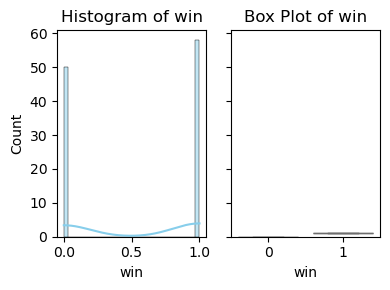

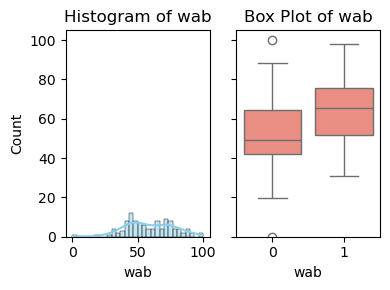

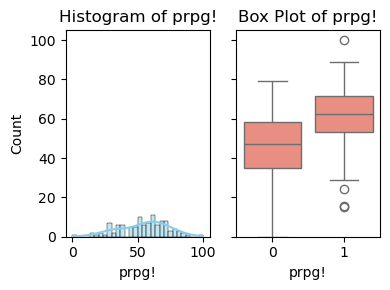

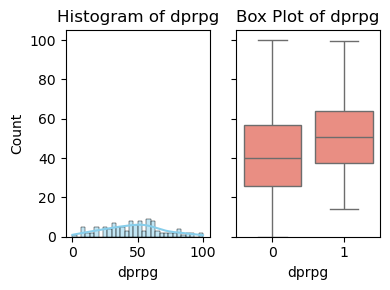

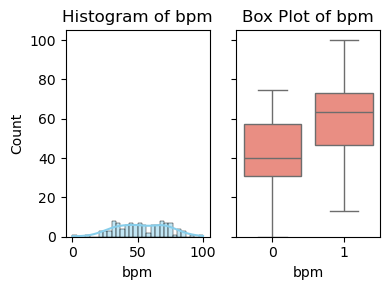

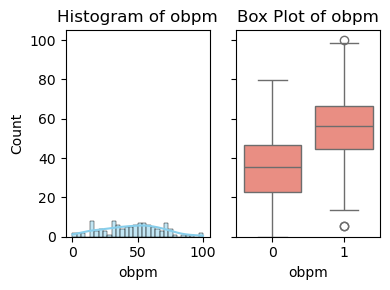

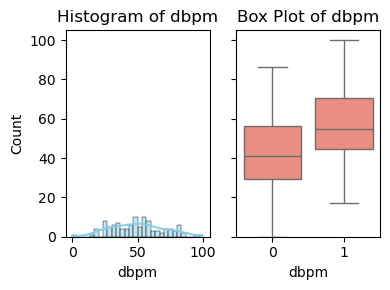

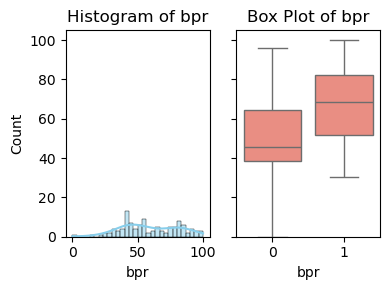

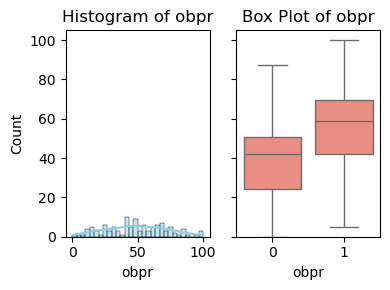

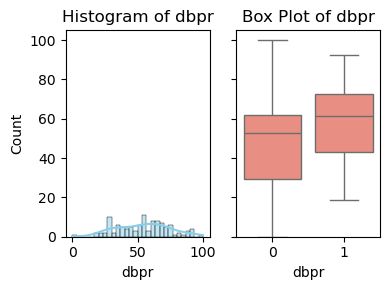

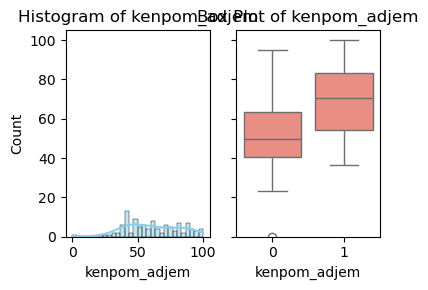

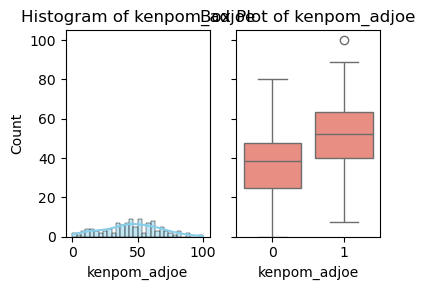

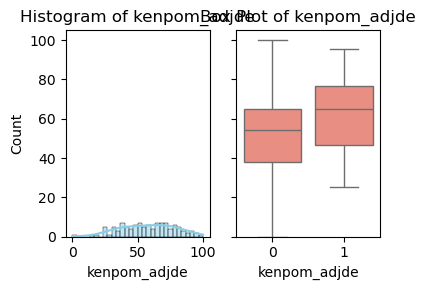

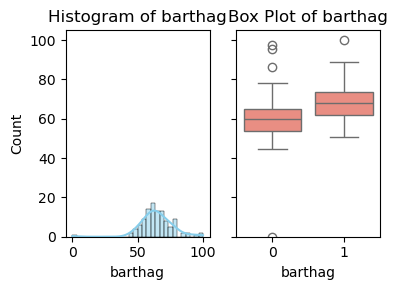

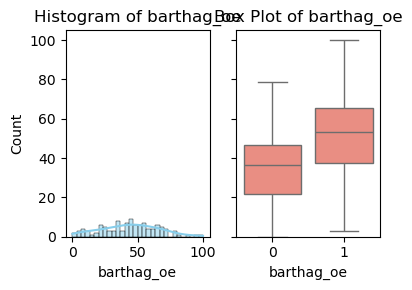

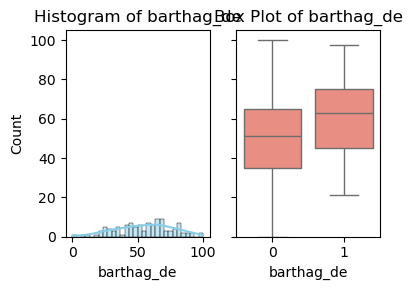

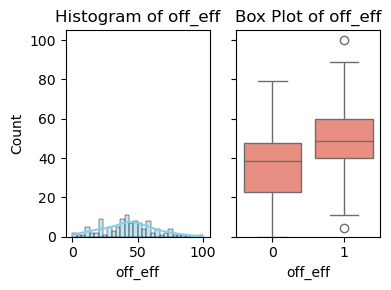

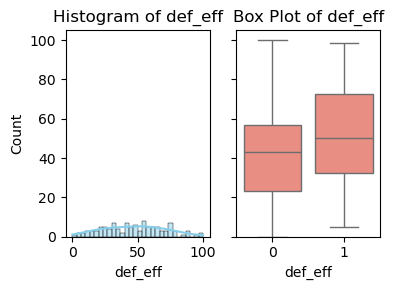

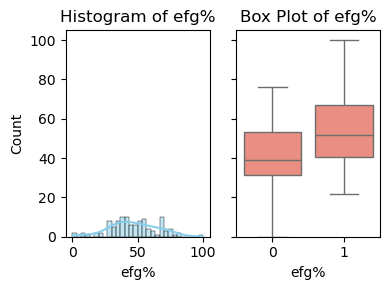

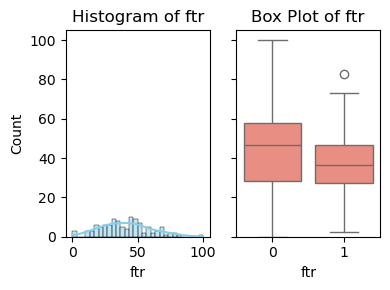

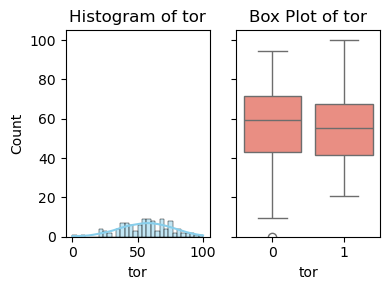

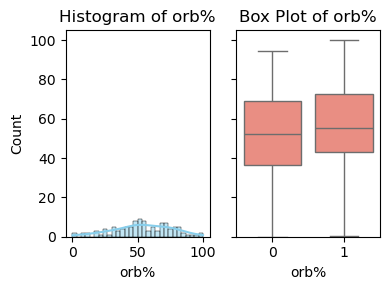

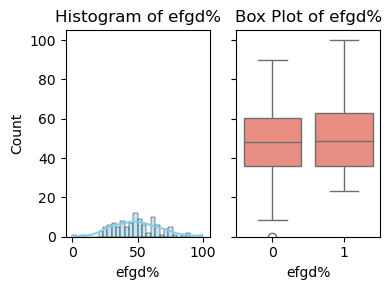

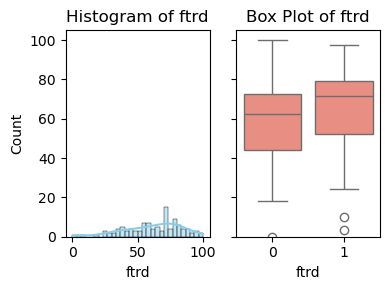

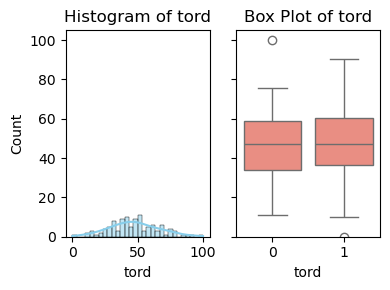

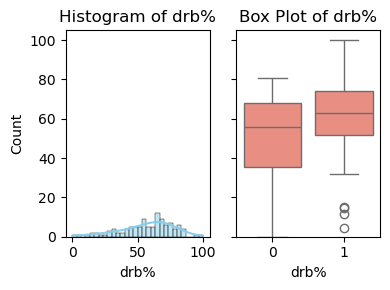

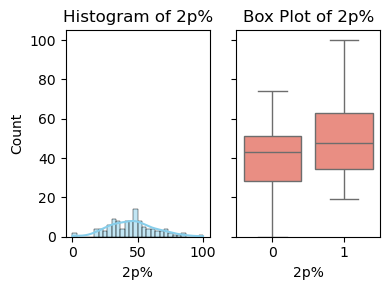

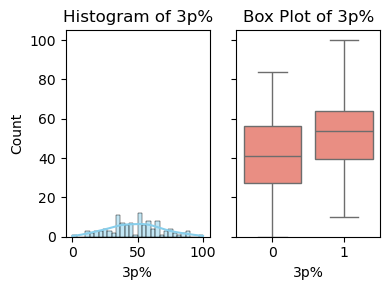

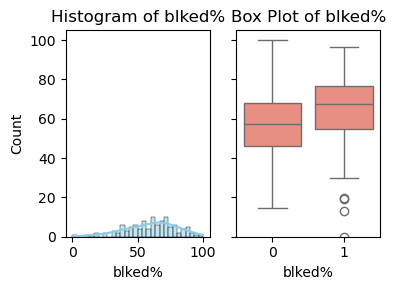

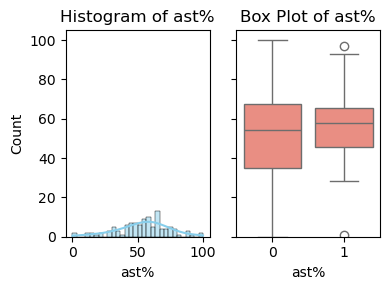

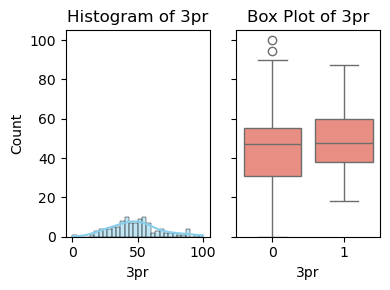

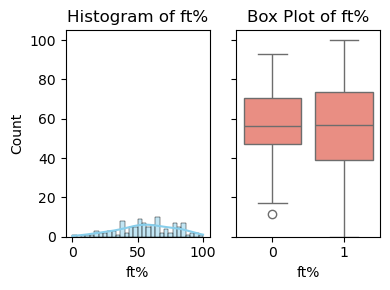

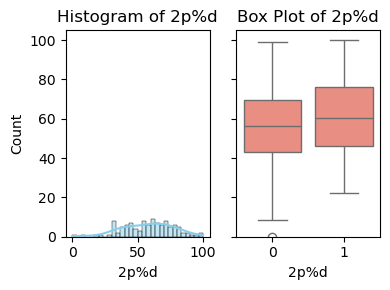

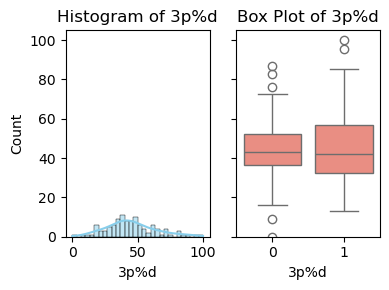

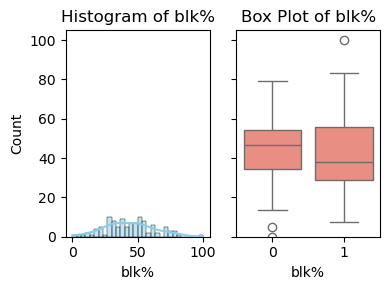

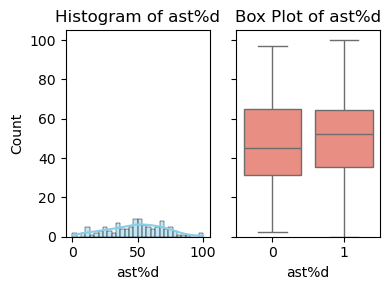

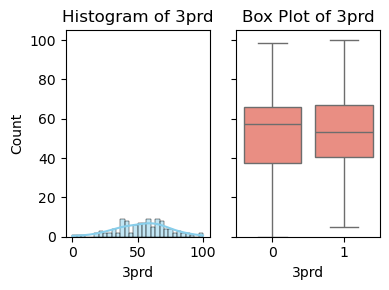

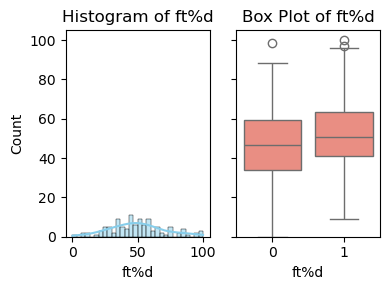

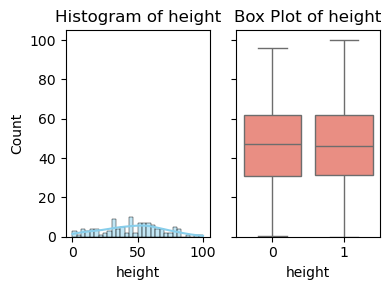

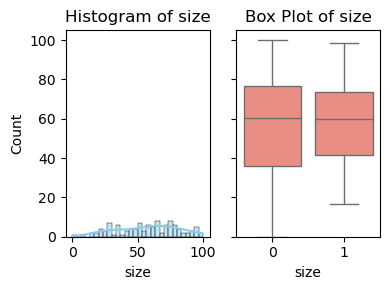

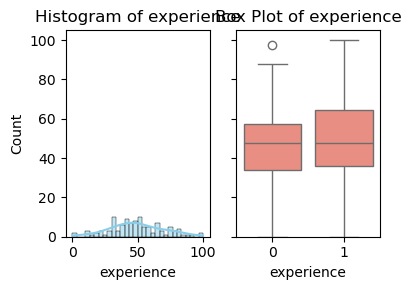

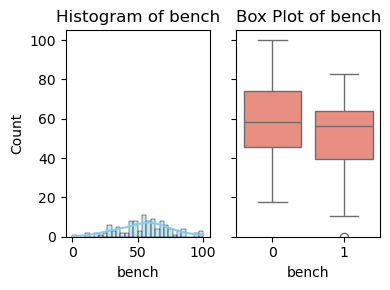

In [18]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_num
numeric_columns = train_num.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [19]:
corr_matrix = train_num.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

win            100.0000
wab             35.8200
prpg!           38.5100
dprpg           24.7900
bpm             43.1000
obpm            38.3200
dbpm            33.0700
bpr             37.6800
obpr            35.3900
dbpr            24.3800
kenpom_adjem    38.7300
kenpom_adjoe    31.8100
kenpom_adjde    23.2100
barthag         31.8700
barthag_oe      36.2500
barthag_de      24.1700
off_eff         29.9400
def_eff         19.2900
efg%            32.4800
ftr             11.1500
orb%            12.8900
efgd%           10.1100
ftrd            11.5800
drb%            22.7400
2p%             24.3300
3p%             28.1800
blked%          14.4100
ast%            13.9600
3pr             10.6900
2p%d            13.0300
ft%d            16.1600
bench           19.4900
Name: win, dtype: float64


In [20]:
X = train_num.drop('win', axis=1)
y = train_num['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,15.5990,0.0001,0.0000
1,prpg!,18.4626,0.0000,0.1321
2,dprpg,6.9416,0.0097,0.1059
3,bpm,24.1880,0.0000,0.1125
4,obpm,18.2435,0.0000,0.1412
5,dbpm,13.0176,0.0005,0.0193
6,bpr,17.5366,0.0001,0.0933
7,obpr,15.1753,0.0002,0.0447
8,dbpr,6.7000,0.0110,0.0189
9,kenpom_adjem,18.7015,0.0000,0.1073


In [21]:
stats_df[stats_df['mutual_info'] > .05]

,feature,f_values,p_values,mutual_info
1,prpg!,18.4626,0.0000,0.1321
2,dprpg,6.9416,0.0097,0.1059
3,bpm,24.1880,0.0000,0.1125
4,obpm,18.2435,0.0000,0.1412
6,bpr,17.5366,0.0001,0.0933
9,kenpom_adjem,18.7015,0.0000,0.1073
12,barthag,11.9809,0.0008,0.0519
18,ftr,1.3342,0.2507,0.0715
24,drb%,5.7805,0.0179,0.0670
25,2p%,6.6710,0.0112,0.0872


In [22]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,wab,15.5990,0.0001,0.0000
1,prpg!,18.4626,0.0000,0.1321
2,dprpg,6.9416,0.0097,0.1059
3,bpm,24.1880,0.0000,0.1125
4,obpm,18.2435,0.0000,0.1412
5,dbpm,13.0176,0.0005,0.0193
6,bpr,17.5366,0.0001,0.0933
7,obpr,15.1753,0.0002,0.0447
8,dbpr,6.7000,0.0110,0.0189
9,kenpom_adjem,18.7015,0.0000,0.1073


In [23]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,wab,15.5990,0.0001,0.0000
1,prpg!,18.4626,0.0000,0.1321
2,dprpg,6.9416,0.0097,0.1059
3,bpm,24.1880,0.0000,0.1125
4,obpm,18.2435,0.0000,0.1412
5,dbpm,13.0176,0.0005,0.0193
6,bpr,17.5366,0.0001,0.0933
7,obpr,15.1753,0.0002,0.0447
8,dbpr,6.7000,0.0110,0.0189
9,kenpom_adjem,18.7015,0.0000,0.1073


In [24]:
# Remove any numerical variables who hit 0 criteria
# Remove any categorical variables who's win percentage is less than Round 1 win percentage
train_df = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    '2p%d', 
    'ft%d', 
    'bench',  
    'S_A', 
    'S_B', 
    'S_C',  
    'A_S', 
    'A_B', 
    'B_C',  
    'C_S', 
    'C_A', 
    'C_B']]

test_df = test_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    '2p%d', 
    'ft%d', 
    'bench', 
    'S_A', 
    'S_B', 
    'S_C',  
    'A_S', 
    'A_B', 
    'B_C',  
    'C_S', 
    'C_A', 
    'C_B']]

### III. Wrapper Methods

In [25]:
X_train = train_df.iloc[:,1:]
Y_train = train_df['win']

X_test = test_df.iloc[:,1:]
Y_test = test_df['win']

float64_columns = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[float64_columns] = scaler.fit_transform(X_train[float64_columns])

X_test_scaled = X_test.copy()
X_test_scaled[float64_columns] = scaler.transform(X_test[float64_columns])

In [26]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [27]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 40
selected features: 12
features with coefficients shrank to zero: 28


In [28]:
selected_feat

Index(['bpm', 'dbpm', 'barthag_oe', 'ftr', 'orb%', 'efgd%', 'drb%', '3p%',
       'blked%', '3pr', 'ft%d', 'bench'],
      dtype='object')

In [29]:
# Transform datasets based on selected features
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

# Train a Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

# Convert predictions to binary using a threshold
threshold = 0.5
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Evaluate F1 scores
f1_train = f1_score(y_train, y_train_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print(f"Lasso Regression F1 Score (Train): {f1_train:.2f}")
print(f"Lasso Regression F1 Score (Test): {f1_test:.2f}")

Lasso Regression F1 Score (Train): 0.71
Lasso Regression F1 Score (Test): 0.79


In [30]:
sfs = SequentialFeatureSelector(
        estimator=RandomForestClassifier(
        n_estimators=18, n_jobs=4, random_state=0),
        n_features_to_select=10,  # the number of features to retain
        direction='backward',  # the direction of the selection procedure
        scoring='roc_auc',  # the metric to evaluate
        cv=2, # the cross-validation fold
        n_jobs=None
)


sfs = sfs.fit(X_train, y_train)

In [31]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [32]:
selected_feat= sfs.get_feature_names_out()
selected_feat

array(['wab', 'obpm', 'dbpr', 'kenpom_adjde', 'barthag_de', 'ftr',
       'blked%', 'bench', 'C_S', 'C_B'], dtype=object)

In [33]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9544827586206897
Test set
Random Forests roc-auc: 0.8240740740740741


In [34]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.953448275862069
Test set
Random Forests roc-auc: 0.8425925925925926


In [35]:
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values

[0.5527777777777778,
 0.5138888888888888,
 0.5324074074074074,
 0.5277777777777778,
 0.5481481481481482,
 0.6453703703703704,
 0.5777777777777778,
 0.5157407407407408,
 0.6342592592592593,
 0.5592592592592593,
 0.6018518518518519,
 0.5972222222222222,
 0.5287037037037037,
 0.6648148148148149,
 0.49722222222222223,
 0.6092592592592594,
 0.5962962962962963,
 0.4935185185185186,
 0.4537037037037037,
 0.46481481481481485,
 0.4388888888888889,
 0.43425925925925923,
 0.4546296296296296,
 0.5685185185185186,
 0.4861111111111111,
 0.5842592592592594,
 0.49629629629629635,
 0.5101851851851852,
 0.5037037037037038,
 0.3046296296296296,
 0.3611111111111111,
 0.5379629629629629,
 0.5314814814814816,
 0.625,
 0.5555555555555556,
 0.525,
 0.4814814814814815,
 0.5,
 0.537037037037037,
 0.5305555555555556]

Text(0, 0.5, 'roc-auc')

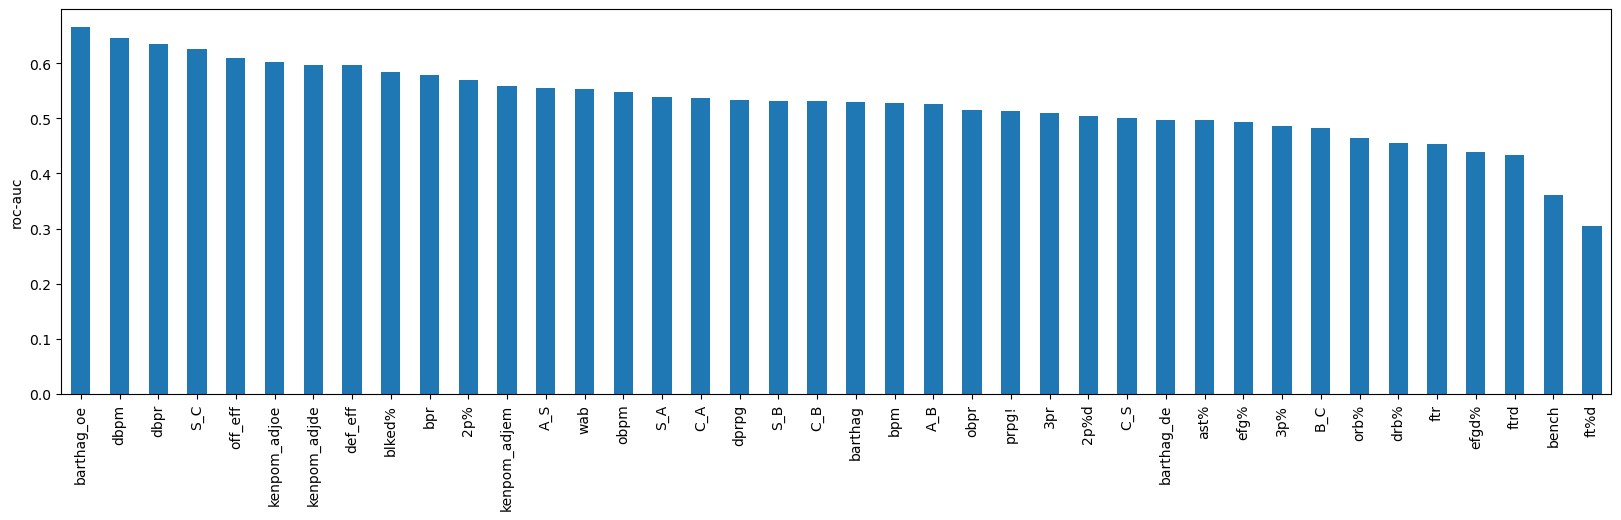

In [36]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [37]:
len(roc_values[roc_values > 0.5])

27

In [38]:
len(roc_values[roc_values > 0.6])

6

In [39]:
roc_values[roc_values > 0.5]

wab            0.5528
prpg!          0.5139
dprpg          0.5324
bpm            0.5278
obpm           0.5481
dbpm           0.6454
bpr            0.5778
obpr           0.5157
dbpr           0.6343
kenpom_adjem   0.5593
kenpom_adjoe   0.6019
kenpom_adjde   0.5972
barthag        0.5287
barthag_oe     0.6648
off_eff        0.6093
def_eff        0.5963
2p%            0.5685
blked%         0.5843
3pr            0.5102
2p%d           0.5037
S_A            0.5380
S_B            0.5315
S_C            0.6250
A_S            0.5556
A_B            0.5250
C_A            0.5370
C_B            0.5306
dtype: float64

In [40]:
roc_values[roc_values > 0.6]

dbpm           0.6454
dbpr           0.6343
kenpom_adjoe   0.6019
barthag_oe     0.6648
off_eff        0.6093
S_C            0.6250
dtype: float64

### IV. Exhaustive Feature Selection

In [41]:
X_train_scaled2 = X_train_scaled[[
    'wab', 
    'bpm', 
    'obpm', 
    'dbpm', 
    'dbpr', 
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag_oe', 
    'ftr', 
    'orb%', 
    'efgd%', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    '3pr', 
    '2p%d',  
    'bench',  
    'S_B', 
    'S_C',   
    'C_A']]

X_test_scaled2 = X_test_scaled[[
    'wab', 
    'bpm', 
    'obpm', 
    'dbpm', 
    'dbpr', 
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag_oe', 
    'ftr', 
    'orb%', 
    'efgd%', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    '3pr', 
    '2p%d', 
    'bench',  
    'S_B', 
    'S_C',   
    'C_A']]

In [42]:
# Initialize variables to track the best model
log_reg = LogisticRegression(solver='liblinear')
best_acc = 0
best_features = []
best_train_acc = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_acc = accuracy_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_acc > best_acc:
            best_acc = test_acc
            best_features = subset
            best_train_acc = train_acc

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test Accuracy Score: {best_acc:.4f}")
print(f"Training Accuracy Score of Best Model: {best_train_acc:.4f}")

Best Feature Subset: ('bpm', 'dbpm', 'kenpom_adjoe', 'kenpom_adjde', 'barthag_oe', 'ftr', 'orb%', '2p%', 'blked%', 'S_B')
Best Test Accuracy Score: 0.8936
Training Accuracy Score of Best Model: 0.7685


### IV. XG Boost

In [61]:
X_train2 = X_train[[
    'bpm', 
    'dbpm', 
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag_oe', 
    'ftr', 
    'orb%', 
    '2p%', 
    'blked%', 
    'S_B']]

X_test2 = X_test[[
    'bpm', 
    'dbpm', 
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag_oe', 
    'ftr', 
    'orb%', 
    '2p%', 
    'blked%', 
    'S_B']]

In [62]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Set up hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.001, 0.005, 0.01],
    'n_estimators': [200, 300, 400, 500, 1000],
    'subsample': [0.4, 0.5, 0.6, 0.7],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Hyperparameters: {'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.7}


In [63]:
# Retrain the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params
)

best_xgb_model.fit(X_train_scaled2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=400,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [64]:
# Predict probabilities
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled2)[:, 1]

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on test set: {logloss}")

Log Loss on test set: 0.5346016048570716


In [65]:
# Predictions
y_train_pred = best_xgb_model.predict(X_train_scaled2)
y_test_pred = best_xgb_model.predict(X_test_scaled2)

# Calculate accuracy scores
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy Score on Training Data: {acc_train:.2f}")
print(f"Accuracy Score on Test Data: {acc_test:.2f}")

Accuracy Score on Training Data: 0.98
Accuracy Score on Test Data: 0.74
